In [24]:
# This is the test script for the final submission 
# No external library other than numpy is allowed 

# sys is only used to point to the correct folder
import sys
sys.path.insert(0, 'project1/scripts')

# import all the functions from the helper module 
from proj1_helpers import *
from implementations import *
from plot_helpers import * 

In [13]:
# Import, fill in missing values with average, and perform data preprocessing 
y, inputs, ids = load_clean_csv("train.csv", False, missing_val="avg")

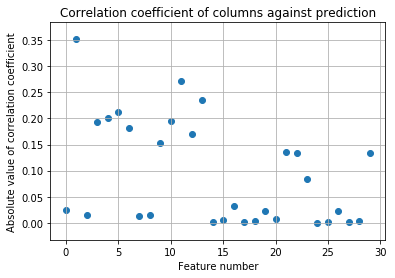

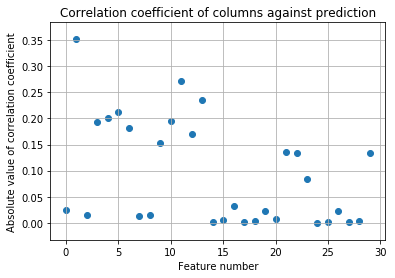

In [14]:
# Obtain features by finding correlation coefficients
coef_vec = pairwise_correlation(y, inputs)
pairwise_correlation_plot(coef_vec)

feature_threshold = 0.1 
feature_list = feature_select(coef_vec, feature_threshold)
corr_matrix = correlation_matrix(inputs, feature_list)
# print("feature list before removing the duplicates", feature_list)
# feature_correlation_plot(corr_matrix)


In [15]:
# remove from feature list features with correlation coef higher than threhold
duplicate_threshold = 0.8

feature_list = feature_extract(feature_list, corr_matrix, duplicate_threshold)
corr_matrix = correlation_matrix(inputs, feature_list)
# print("feature list after removing the duplicates", feature_list)
# feature_correlation_plot(corr_matrix)

In [16]:
import itertools as it

def build_poly_plus(x, degree):
    """
    Builds polynomial basis function of a certain degree combining all features.
    """
    poly = np.ones((len(x), 1))

    for deg in range(1, degree+1):
#         print(deg)
        if deg == 1:
            poly = np.c_[poly, x]
        else:
            for i in it.combinations_with_replacement(range(x.shape[1]),deg):
                poly = np.c_[poly, np.prod(x[:,i],1)]
    return poly

In [17]:
x = inputs[:, feature_list]
degree = 4
k_fold = 4

tx = build_poly_plus(x, degree)
print(tx.shape)
lambdas = np.logspace(-5, 0, 20)
k_indices = build_k_indices(y, k_fold, 1)

opt_lambda, rmse_tr, rmse_te = find_lambda(lambdas, y, tx, k_indices, k_fold, degree)

(250000, 210)
(250000, 210)


0.026366508987303583
0.026366508987303583


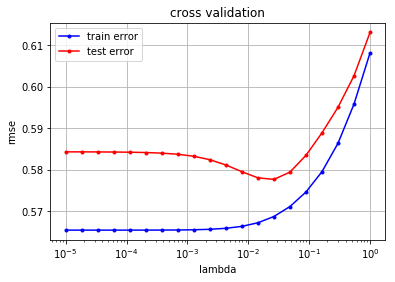

(4, 62500)


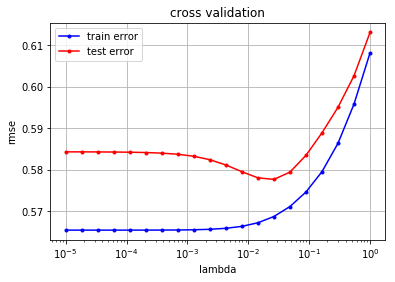

(4, 62500)


In [18]:
print(opt_lambda)
cross_validation_plot(lambdas, rmse_tr, rmse_te)

In [19]:
tx_train, y_train, tx_test, y_test = split_data(tx, y, 0.5)

# weights, mse = ridge_regression(y_train, tx_train, opt_lambda)

weights, mse = find_weight(y, tx, k_indices, opt_lambda, k_fold, degree)

# print(weights.shape)

y_pred = predict_labels(weights, tx_test)

compute_score(y_test, y_pred)

rmse_train = np.sqrt(2*compute_mse(y_train, tx_train, weights))
rmse_test = np.sqrt(2*compute_mse(y_test, tx_test, weights))
print("Train RMSE:", rmse_train, ", Test RMSE:", rmse_test)


# ignore: 
# Total correct: 25127.0 
# Total incorrect: 8930.0 
# Correct percentage: 73.77925242975012 %
# Train RMSE: 0.9343418873952883 , Test RMSE: 0.9337667902727746

# median: 
# Total correct: 95019.0 
# Total incorrect: 29981.0 
# Correct percentage: 76.01520000000001 %
# Train RMSE: 0.9228025288225072 , Test RMSE: 0.9226877174336481

# Average performs the best 

Total correct: 95019.0 
Total incorrect: 29981.0 
Correct percentage: 76.01520000000001 %
Train RMSE: 0.9228025288225072 , Test RMSE: 0.9226877174336481
Total correct: 95019.0 
Total incorrect: 29981.0 
Correct percentage: 76.01520000000001 %
Train RMSE: 0.9228025288225072 , Test RMSE: 0.9226877174336481


In [28]:
y_test, inputs_test, ids_test = load_clean_csv('test.csv', False, "avg", True)

In [26]:
tx_test = build_poly_plus(inputs_test[:,feature_list], degree)
y_pred = predict_labels(weights, tx_test)

In [27]:
create_csv_submission(ids_test, y_pred, "prediction.csv")